In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import *
import sys
sys.path.append('/home/kjetil/projects/alsvinn/build/python/')
import alsvinn
import os


import matplotlib2tikz



def showAndSave(name):
    matplotlib2tikz.save(os.path.join('../img_tikz/', name + '.tikz'),
           figureheight = '\\figureheight',
           figurewidth = '\\figurewidth')
    
    plt.savefig(os.path.join('../img/', name + '.png'))

    plt.show()

kh_1.nc
file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}


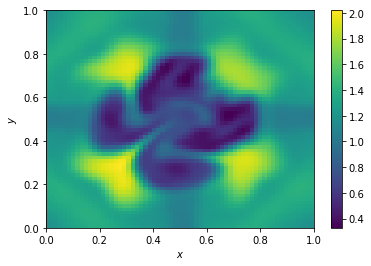

kh_1.nc
file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}


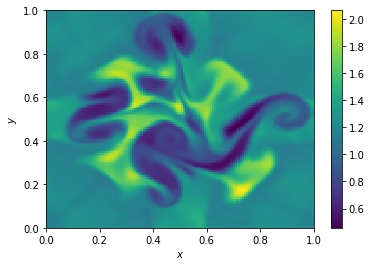

kh_1.nc
file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}


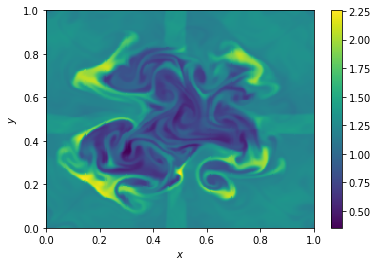

kh_1.nc
file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}


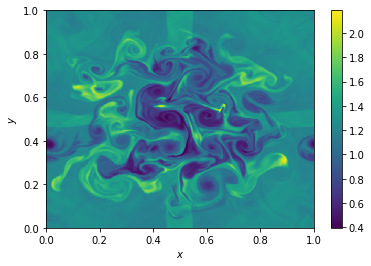

kh_1.nc
file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}


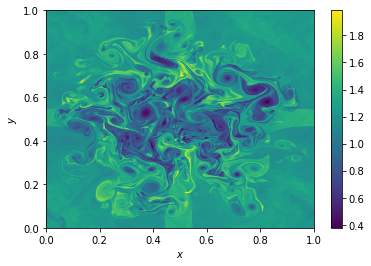

file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
\usepgfplotslibrary{plotmarks}


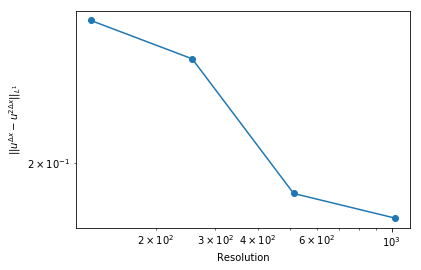

In [6]:
resolutions = [64,128,256,512,1024]
samples = 1
errors = [[] for k in range(samples)]
dataPrev = [None for k in range(samples)]
for resolution in resolutions:
    runner = alsvinn.run(name='kh', base_xml='richtmeyermeshkov/richtmeyermeshkov.xml', 
                         dimension=[resolution, resolution, 1], T=5, 
                         uq=True, number_of_saves=1, statistics=['meanvar'], samples=samples)    
    
    for sample in range(samples):
        data = runner.get_data('rho', 1, sample=sample).T
        
        x,y = mgrid[0:1:resolution*1j, 0:1:resolution*1j]
        plt.pcolormesh(x, y, data)
        plt.colorbar()
        plt.xlabel('$x$')
        plt.ylabel('$y$')
        showAndSave('rm_single_%d_%d' % (resolution, sample))
        
        if resolution > resolutions[0]:
            errors[sample].append(sum(abs(data-dataPrev[sample]))/resolution**2)
        dataPrev[sample] = repeat(repeat(data, 2, 0), 2, 1)
for sample in range(samples):
    plt.loglog(resolutions[1:], errors[sample], '-o')
    plt.xlabel('Resolution')
    plt.ylabel('$||u^{\Delta x}-u^{2\Delta x}||_{L^1}$')
    showAndSave('rm_single_l1_convergence_%d' % sample)

file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
\usepgfplotslibrary{plotmarks}


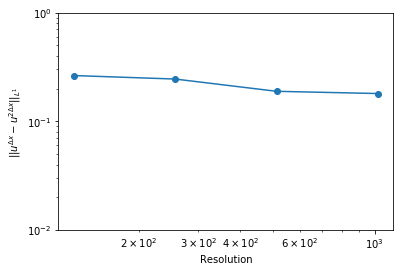

In [8]:
for sample in range(samples):
    plt.loglog(resolutions[1:], errors[sample], '-o')
    plt.xlabel('Resolution')
    plt.ylabel('$||u^{\Delta x}-u^{2\Delta x}||_{L^1}$')
    plt.ylim([1e-2,1])
    showAndSave('rm_single_l1_convergence_%d' % sample)

In [3]:
print(errors)

[0.14479147393671529, 0.12416050013403473, 0.12215436778411751, 0.10677468030267938]
